In [1]:
# reload imports on every cell exectution
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from src.data.create_corpus_dataset import create_dataset
from src.data.classes import UtteranceType, DatasetConfig, DatasetSplitType
from datasets import load_from_disk
from collections import defaultdict

from src.models.train_model_sweep import load_argument_graphs

# load dataset
project_dir = "/home/christian/PycharmProjects/ethikchat-experiment-argument-classification"
corpus_dataset_name = "corpus_dataset_v3"
dataset_folder = os.path.join(project_dir, "data/processed/with_context")
dataset_path = os.path.join(dataset_folder, corpus_dataset_name)
output_directory = os.path.join(project_dir, f"reports/dataset_statistics/{corpus_dataset_name}/corpus_dataset")

os.makedirs(output_directory, exist_ok=True)

if not os.path.exists(dataset_path):
    # Beispiel zum Erstellen eines Datensatzes. Mögliche Optionen von DatasetConfig sind im DocString beschrieben.
    create_dataset(
        DatasetConfig(
            dataset_path=dataset_path,
            project_dir="../../../",
            utterance_type=UtteranceType.User,
            eval_size=0.5,
            validation_test_ratio=0.5
        )
    )

# Beispiel zum Laden des Datensatzes + collate_function des DataLoaders um dynamisch ein Subset der negative passages zu laden.
corpus_dataset = load_from_disk(dataset_path)
argument_graphs = load_argument_graphs(project_dir, is_test_run=True)

Loading templates from file /home/christian/PycharmProjects/ethikchat-experiment-argument-classification/data/external/argument_graphs_test/szenario_s1/templates_introductions.csv ... Done
Loading templates from file /home/christian/PycharmProjects/ethikchat-experiment-argument-classification/data/external/argument_graphs_test/szenario_s1/templates_transitions.csv ... Done
Loading templates from file /home/christian/PycharmProjects/ethikchat-experiment-argument-classification/data/external/argument_graphs_test/szenario_s1/templates_groups.csv ... Done
Loading templates from file /home/christian/PycharmProjects/ethikchat-experiment-argument-classification/data/external/argument_graphs_test/szenario_s1/templates_zargs.csv ... Done
Loading templates from file /home/christian/PycharmProjects/ethikchat-experiment-argument-classification/data/external/argument_graphs_test/szenario_s1/templates_nzargs.csv ... Done
Loading templates from file /home/christian/PycharmProjects/ethikchat-experimen

In [3]:
labels_per_scenario = {}
for scenario, argument_graph in argument_graphs.items():
    labels_per_scenario[scenario] = argument_graph.user_intent_labels
labels_per_scenario

{'MEDAI': {'FAQ.1',
  'FAQ.2',
  'FAQ.3',
  'FAQ.4',
  'FAQ.5',
  'FAQ.6',
  'FAQ.7',
  'FAQ.8',
  'NZ.K1',
  'NZ.K10',
  'NZ.K11',
  'NZ.K3',
  'NZ.K4',
  'NZ.K6',
  'NZ.K8',
  'NZ.K9',
  'NZ.P1',
  'NZ.P1-1',
  'Z.K1',
  'Z.K1-1',
  'Z.K1-2',
  'Z.K10',
  'Z.K10-1',
  'Z.K10-2',
  'Z.K11',
  'Z.K11-1',
  'Z.K12',
  'Z.K12-1',
  'Z.K13',
  'Z.K13-1',
  'Z.K14',
  'Z.K14-1',
  'Z.K15',
  'Z.K15-1',
  'Z.K16',
  'Z.K16-1',
  'Z.K18',
  'Z.K18-1',
  'Z.K19',
  'Z.K19-1',
  'Z.K2',
  'Z.K2-4',
  'Z.K20',
  'Z.K3',
  'Z.K3-1',
  'Z.K3-1-1',
  'Z.K3-2',
  'Z.K4',
  'Z.K4-1',
  'Z.K5',
  'Z.K5-1',
  'Z.K6',
  'Z.K6-1',
  'Z.K7',
  'Z.K7-1',
  'Z.K8',
  'Z.K8-1',
  'Z.K8-2',
  'Z.K9',
  'Z.K9-1',
  'Z.P1',
  'Z.P1-1',
  'Z.P1-1-1',
  'Z.P2',
  'Z.P3',
  'Z.P3-1',
  'Z.P3-1-1',
  'Z.P3-2',
  'Z.P4',
  'Z.P4-1',
  'Z.P5',
  'Z.P5-1',
  'Z.P6',
  'Z.P6-1',
  'Z.P6-1-1',
  'Z.P7',
  'Z.P7-1'},
 'JURAI': {'FAQ.1',
  'FAQ.2',
  'FAQ.3',
  'FAQ.4',
  'FAQ.5',
  'FAQ.6',
  'NZ.K1',
  'NZ.K10',
  'NZ.

In [4]:
passages = corpus_dataset['passages']
passages_df = passages.to_pandas()
counts = passages_df.groupby(["discussion_scenario", "label"]).size().unstack(fill_value=0)
counts

label,FAQ.1,FAQ.2,FAQ.3,FAQ.4,FAQ.5,FAQ.6,FAQ.7,FAQ.8,NZ.K1,NZ.K10,...,Z.P8,Z.P8-1,Z.P8-1-1,Z.P8-1-2,Z.P8-1-2-1,Z.P8-2,Z.P9,Z.P9-1,Z.P9-1-1,Z.P9-2
discussion_scenario,,,,,,,,,,,,,,,,,,,,,
AUTOAI,22,22,26,0,0,0,0,0,0,39,...,59,53,35,76,24,0,39,32,27,0
JURAI,29,27,28,28,29,23,0,0,22,37,...,48,27,0,0,0,32,0,0,0,0
MEDAI,27,39,39,22,24,25,41,27,23,213,...,0,0,0,0,0,0,0,0,0,0
REFAI,22,24,22,22,22,24,26,29,0,50,...,23,22,0,0,0,0,30,23,0,22


In [5]:

from src.statistics.corpus_dataset.utils import get_split_key_count_per_label_for_corpus_dataset

get_split_key_count_per_label_for_corpus_dataset(corpus_dataset, "passages", "label")

,scenario,label,count
0,MEDAI,Z.K1,160
1,MEDAI,Z.P1-1-1,32
2,MEDAI,Z.P3,39
3,MEDAI,Z.P5,56
4,MEDAI,Z.P4-1,44
...,...,...,...
289,REFAI,FAQ.4,22
290,REFAI,FAQ.5,22
291,REFAI,FAQ.6,24
292,REFAI,FAQ.7,26


In [6]:

# Step 1: Load dataset and extract queries
queries = corpus_dataset["queries"]
print(len(queries))
queries = queries.filter(lambda entry: entry["discussion_scenario"] == "MEDAI")
print(len(queries))

queries_df = queries.to_pandas()


# Step 2: Build co-occurrence groups using union-find
class UnionFind:
    def __init__(self):
        self.parent = {}

    def find(self, x):
        if x not in self.parent:
            self.parent[x] = x
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        self.parent[self.find(x)] = self.find(y)


uf = UnionFind()

# Group labels that appear together in any query
for labels in queries_df["labels"]:
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            uf.union(labels[i], labels[j])

# Step 3: Create disjoint label groups
label_groups = defaultdict(set)
for label in set(label for labels in queries_df["labels"] for label in labels):
    group_id = uf.find(label)
    label_groups[group_id].add(label)

# Step 4: Count queries for each group
group_query_counts = defaultdict(int)
for labels in queries_df["labels"]:
    if labels is not None:
        group_id = uf.find(labels[0])
        group_query_counts[frozenset(label_groups[group_id])] += 1

# Output the result
for label_group, count in group_query_counts.items():
    print(f"{sorted(label_group)}: {count}")


2772
1437
['FAQ.1', 'FAQ.2', 'FAQ.7', 'NZ.K10', 'Z.K1', 'Z.K1-1', 'Z.K10', 'Z.K10-2', 'Z.K12', 'Z.K13', 'Z.K14', 'Z.K15', 'Z.K15-1', 'Z.K16', 'Z.K18', 'Z.K19', 'Z.K2', 'Z.K3', 'Z.K4', 'Z.K6', 'Z.K7', 'Z.K7-1', 'Z.K8', 'Z.K9', 'Z.P1', 'Z.P1-1-1', 'Z.P2', 'Z.P3', 'Z.P3-1', 'Z.P4', 'Z.P4-1', 'Z.P5', 'Z.P6', 'Z.P7-1']: 1229
['Z.P1-1']: 28
['NZ.K4']: 2
['NZ.K9']: 16
['Z.K5']: 4
['Z.K5-1']: 9
['Z.K2-4', 'Z.K3-1']: 11
['Z.K14-1']: 6
['FAQ.3']: 17
['Z.K4-1']: 10
['Z.K18-1']: 7
['Z.P5-1']: 6
['FAQ.6']: 3
['FAQ.5']: 2
['Z.K16-1']: 3
['FAQ.8']: 5
['NZ.K3']: 7
['NZ.K8']: 10
['NZ.K6']: 6
['Z.P3-1-1']: 6
['Z.P7']: 4
['Z.P6-1-1']: 1
['Z.K8-1']: 6
['Z.K11']: 8
['NZ.K1']: 1
['Z.K10-1']: 1
['Z.K3-1-1']: 1
['Z.K9-1']: 1
['Z.K20']: 2
['NZ.K11']: 7
['Z.K8-2']: 1
['Z.P3-2']: 6
['Z.P6-1']: 3
['Z.K13-1']: 2
['NZ.P1']: 3
['Z.K6-1']: 1
['Z.K1-2']: 1
['Z.K12-1']: 1


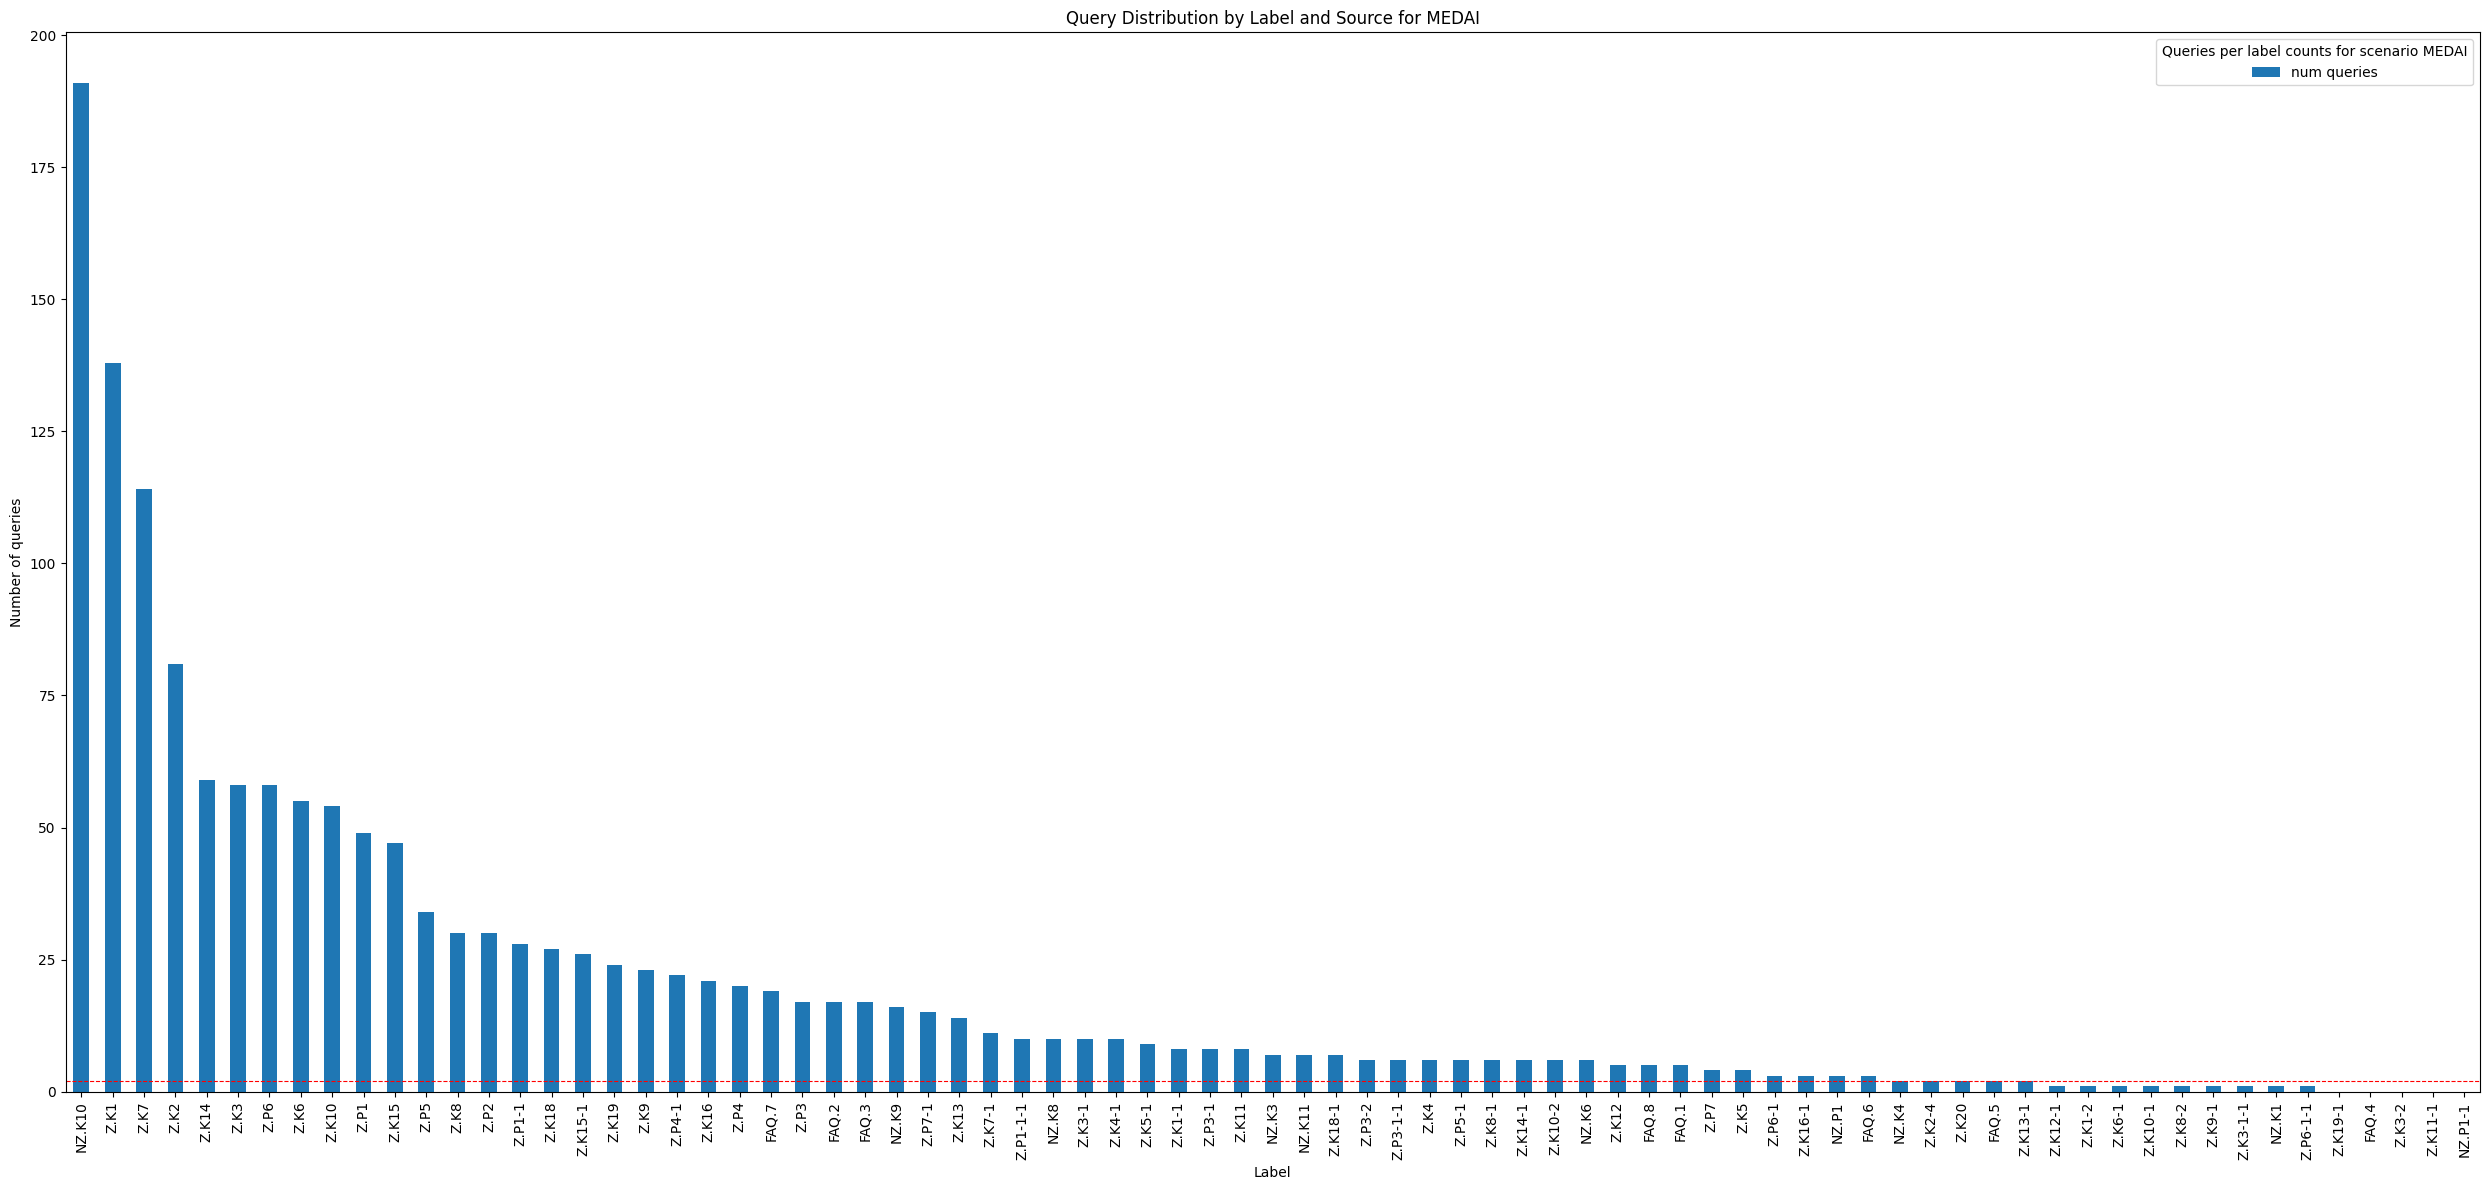

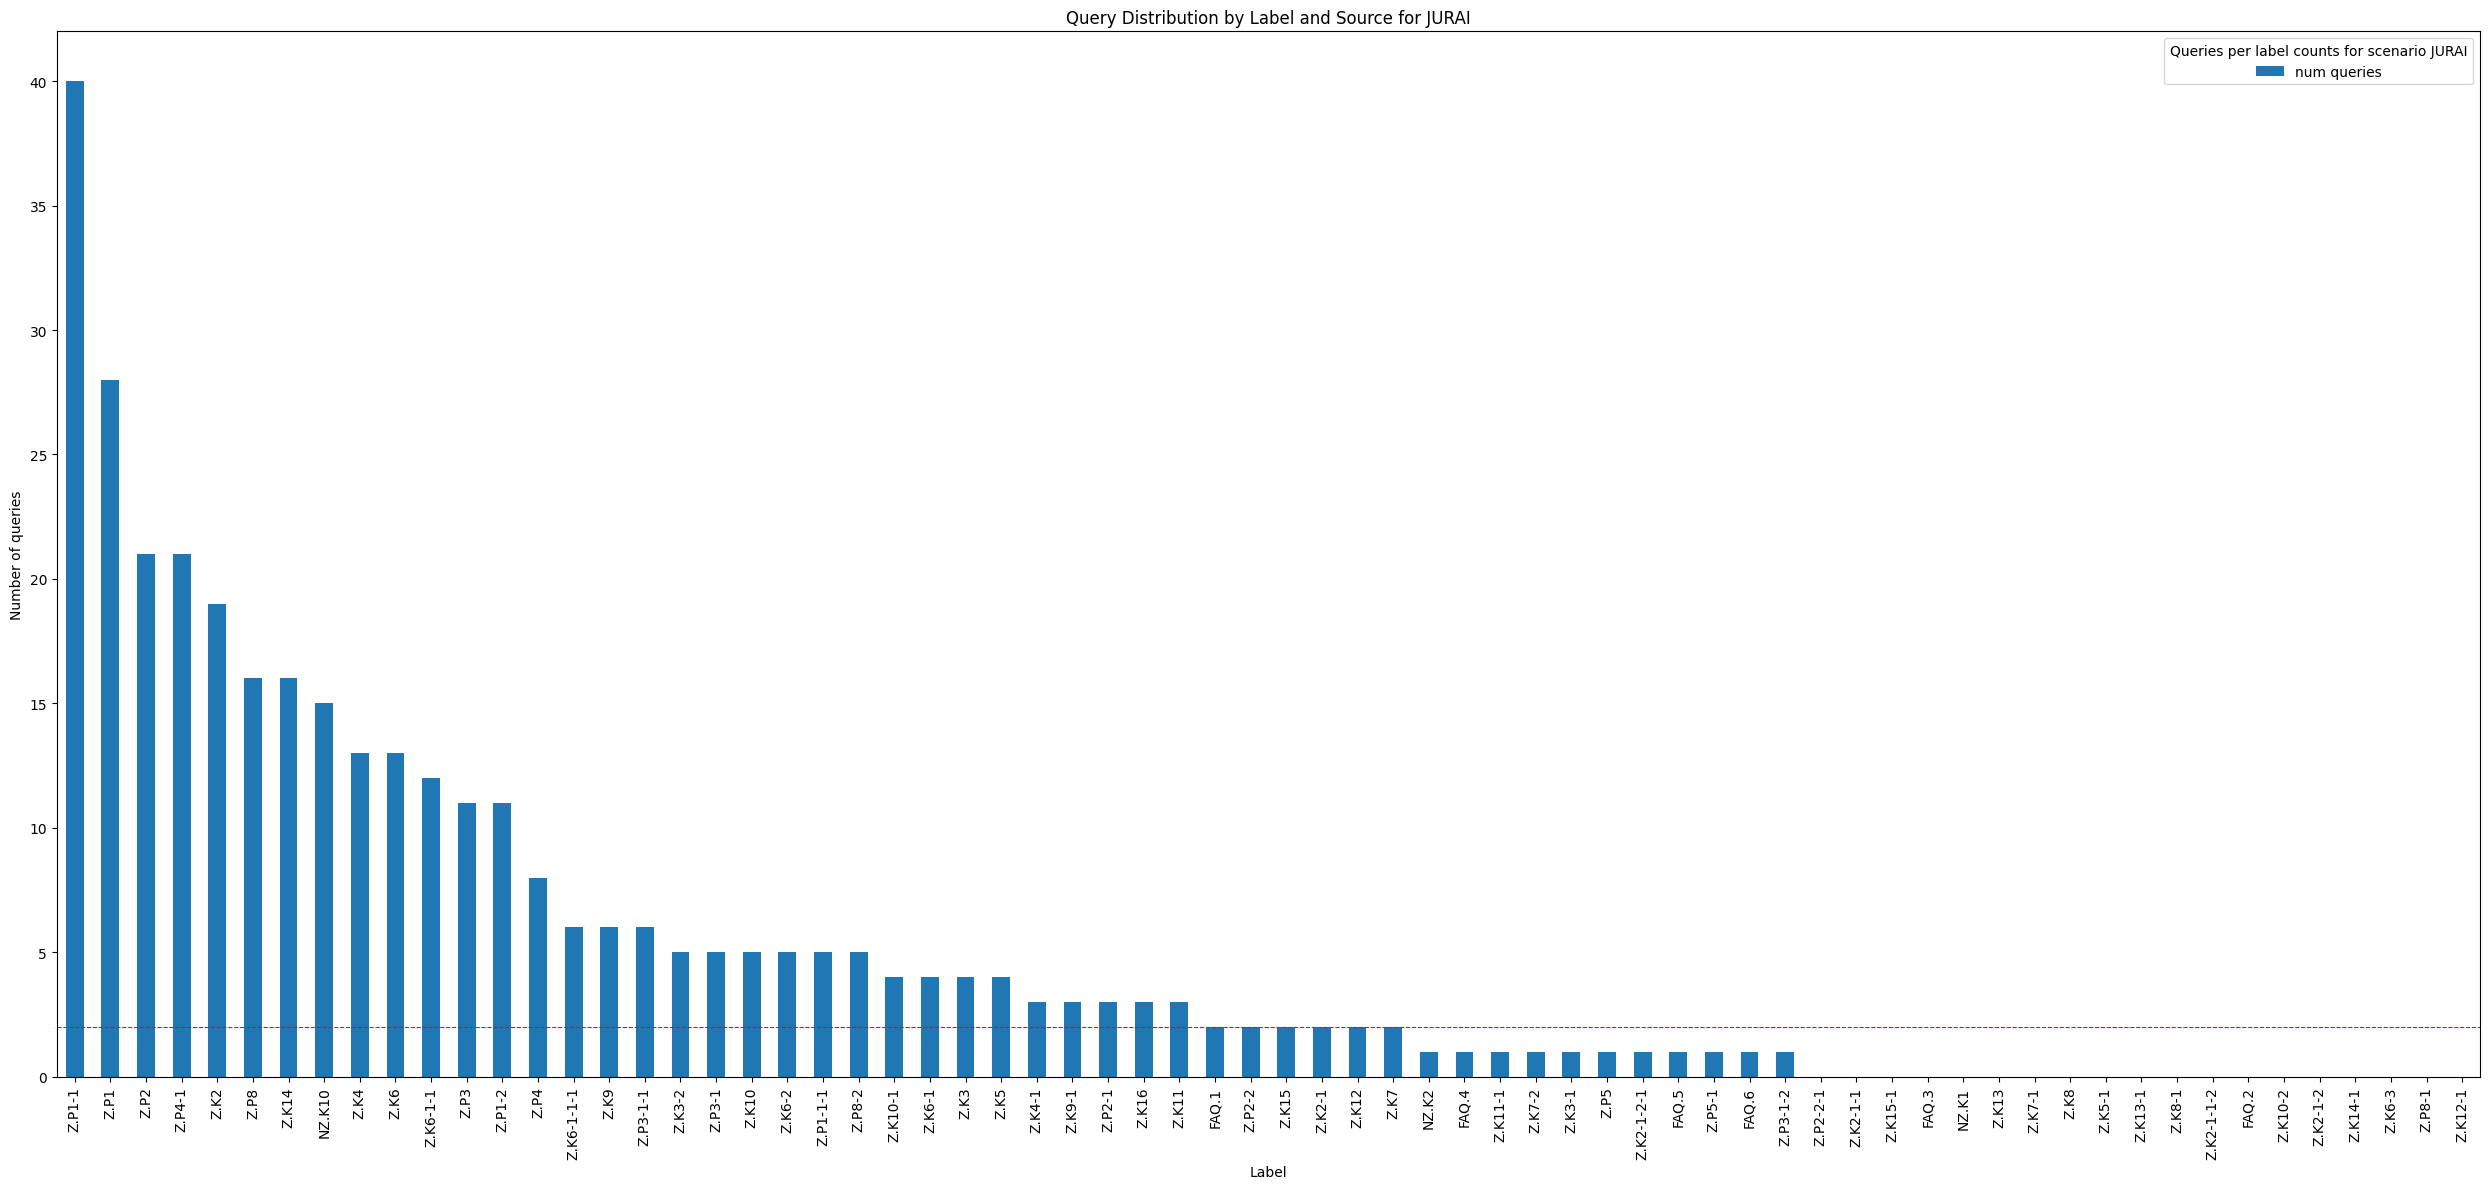

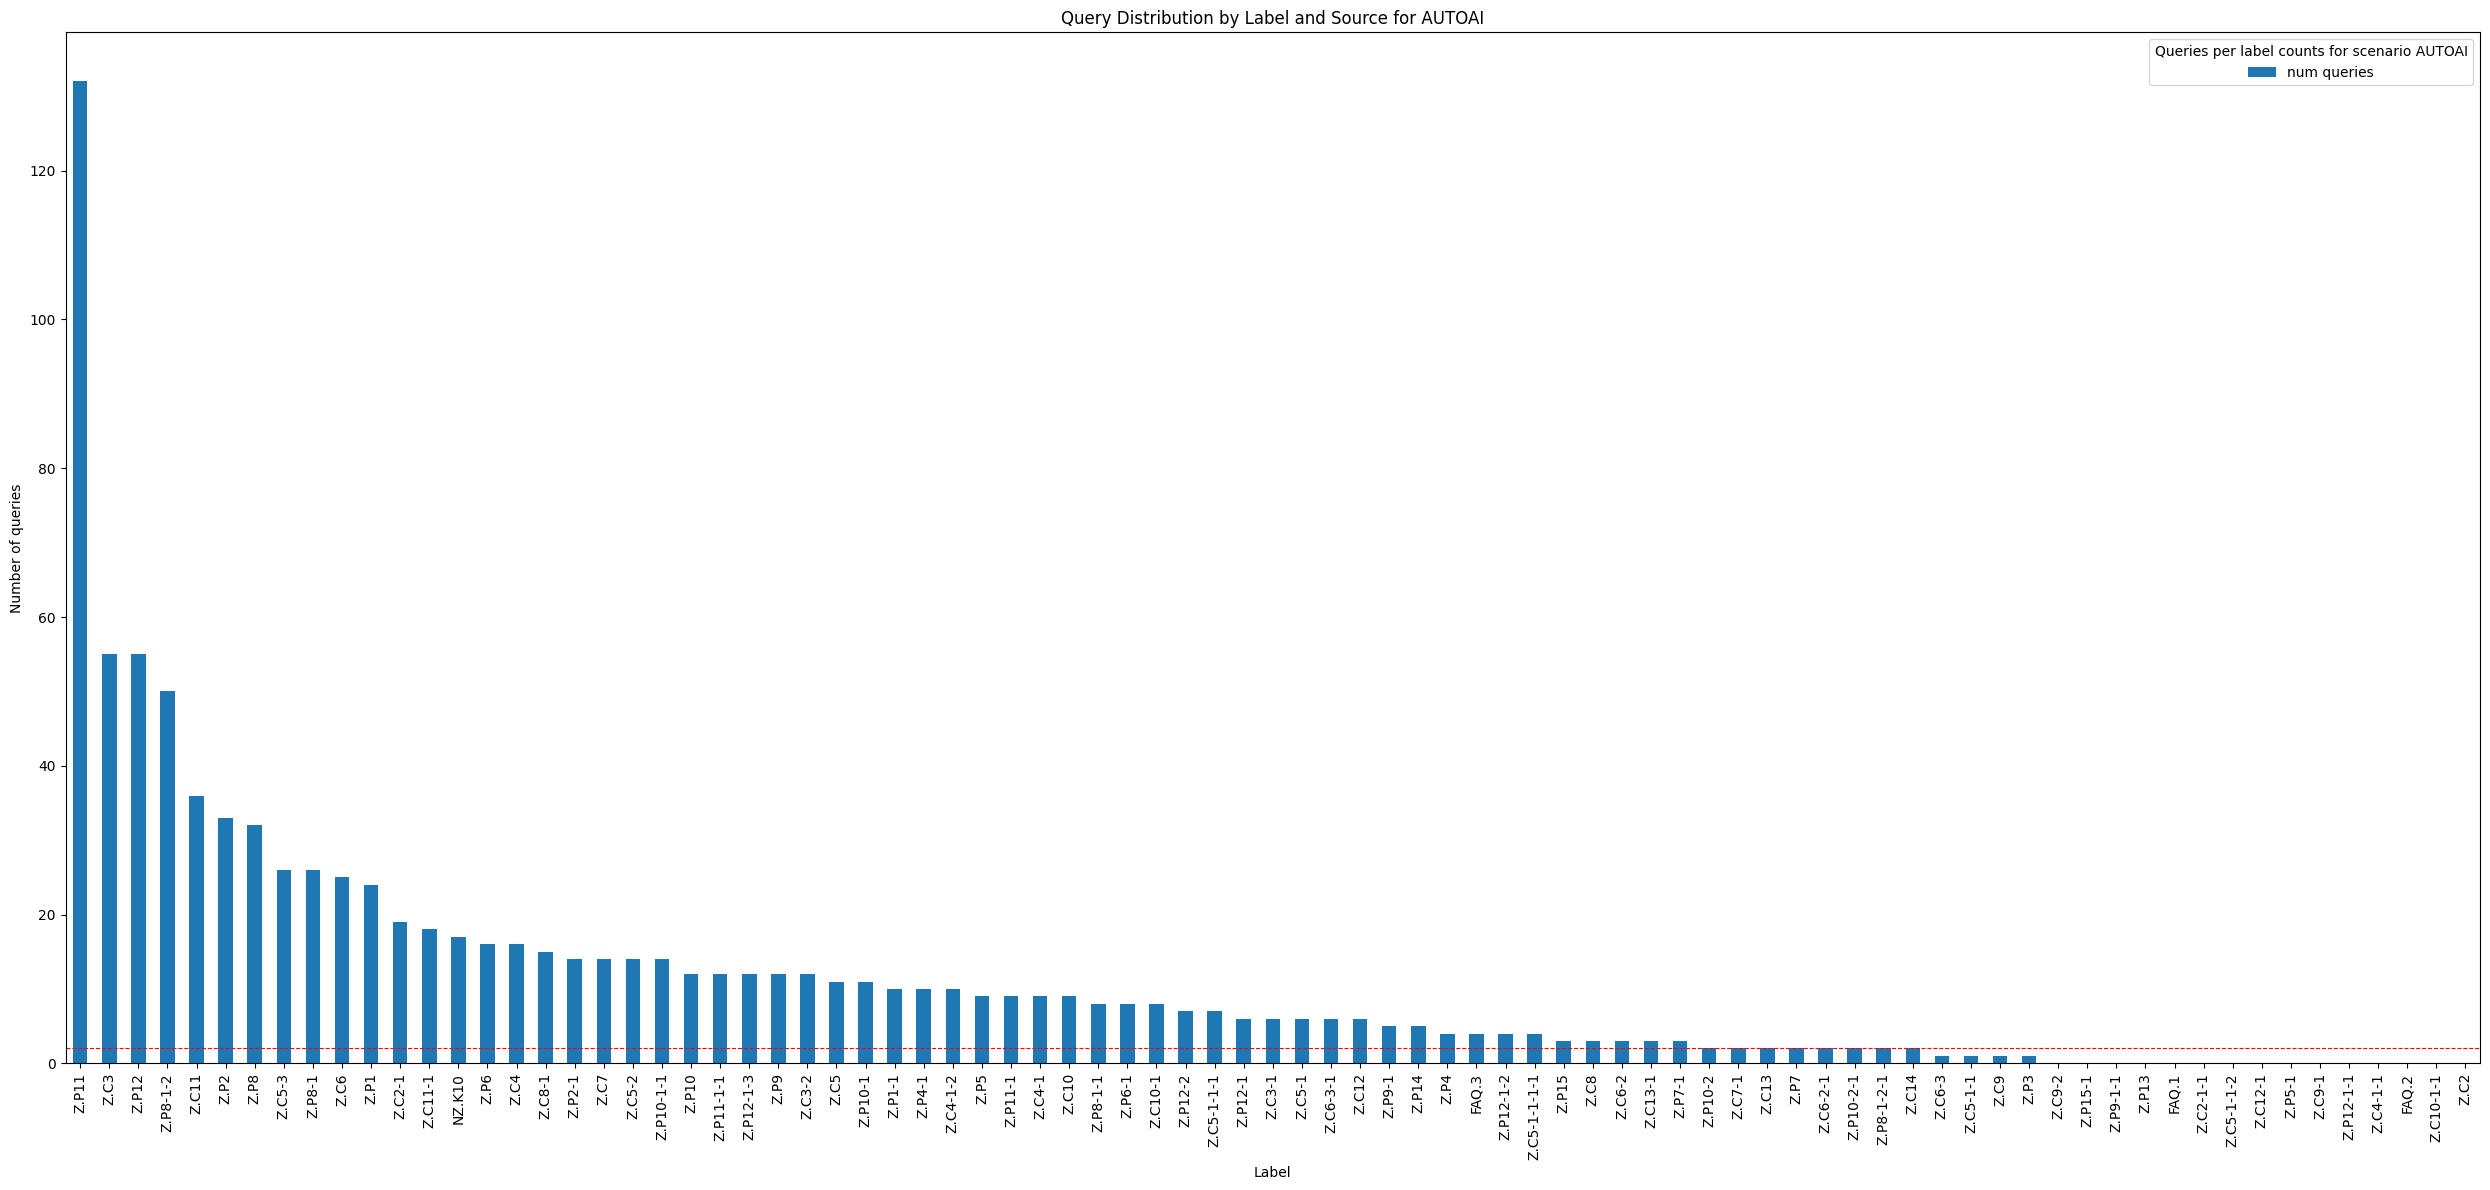

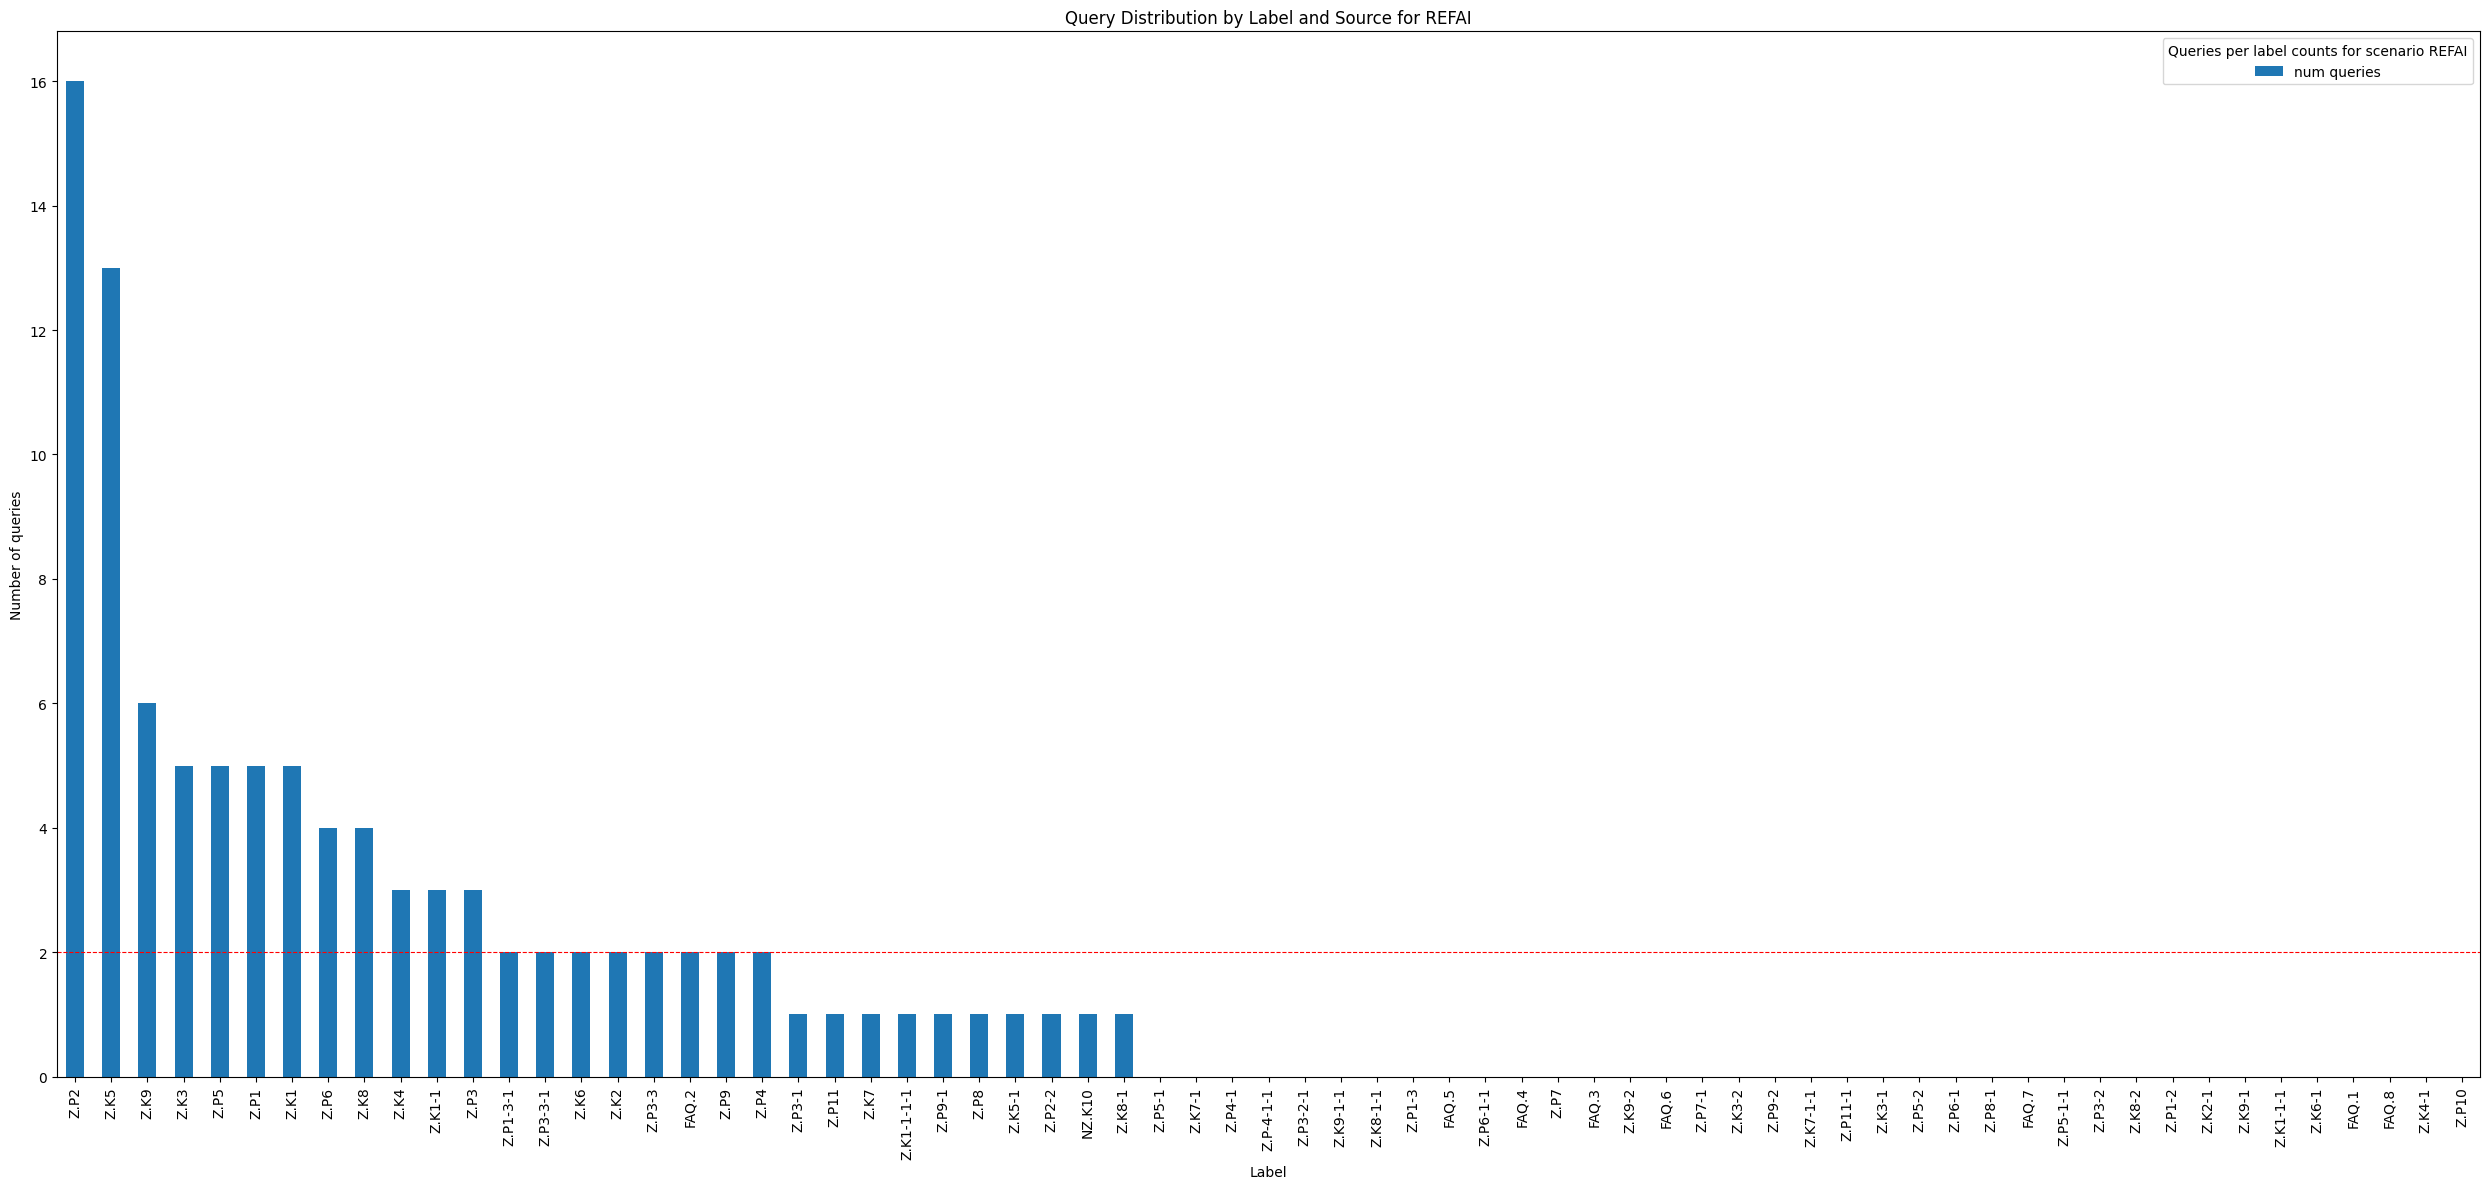

In [7]:
queries = corpus_dataset["queries"]
queries_df = queries.to_pandas()

label_query_counts = defaultdict(lambda: defaultdict(int))
for idx, row in queries_df.iterrows():
    labels = row["labels"]
    scenario = row["discussion_scenario"]
    for label in labels:
        if label in labels_per_scenario[scenario]:
            label_query_counts[scenario][label] += 1

for scenario, labels in labels_per_scenario.items():
    for label in labels:
        if label not in label_query_counts[scenario].keys():
            label_query_counts[scenario][label] = 0

horizontal_bars = [2]

for scenario, counts in label_query_counts.items():
    queries_counts_df = pd.DataFrame(counts.items(), columns=["label", "num queries"])
    queries_counts_df.sort_values("num queries", ascending=False, inplace=True)
    queries_counts_df.to_csv(f"queries_counts_per_label_corpus_dataset_{scenario}.csv")
    ax = queries_counts_df.plot(kind="bar", stacked=True, figsize=(25, 12), x="label")

    # Insert horizontal bars
    for bar_height in horizontal_bars:
        ax.axhline(y=bar_height, color='red', linestyle='--', linewidth=0.8)

    plt.xlabel("Label")
    plt.ylabel("Number of queries")
    plt.title(f"Query Distribution by Label and Source for {scenario}")
    plt.xticks(rotation=90)
    plt.legend(title=f"Queries per label counts for scenario {scenario}")
    plt.tight_layout()
    plt.show()
print("\n\n")



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


scenario    AUTOAI  JURAI  MEDAI  REFAI
label                                  
FAQ.1          0.0    2.0    5.0    0.0
FAQ.2          0.0    0.0   17.0    2.0
FAQ.3          4.0    0.0   17.0    0.0
FAQ.4          0.0    1.0    0.0    0.0
FAQ.5          0.0    1.0    2.0    0.0
...            ...    ...    ...    ...
Z.P8-1-2      50.0    0.0    0.0    0.0
Z.P8-1-2-1     2.0    0.0    0.0    0.0
Z.P8-2         0.0    5.0    0.0    0.0
Z.P9          12.0    0.0    0.0    2.0
Z.P9-1         5.0    0.0    0.0    1.0

[145 rows x 4 columns]


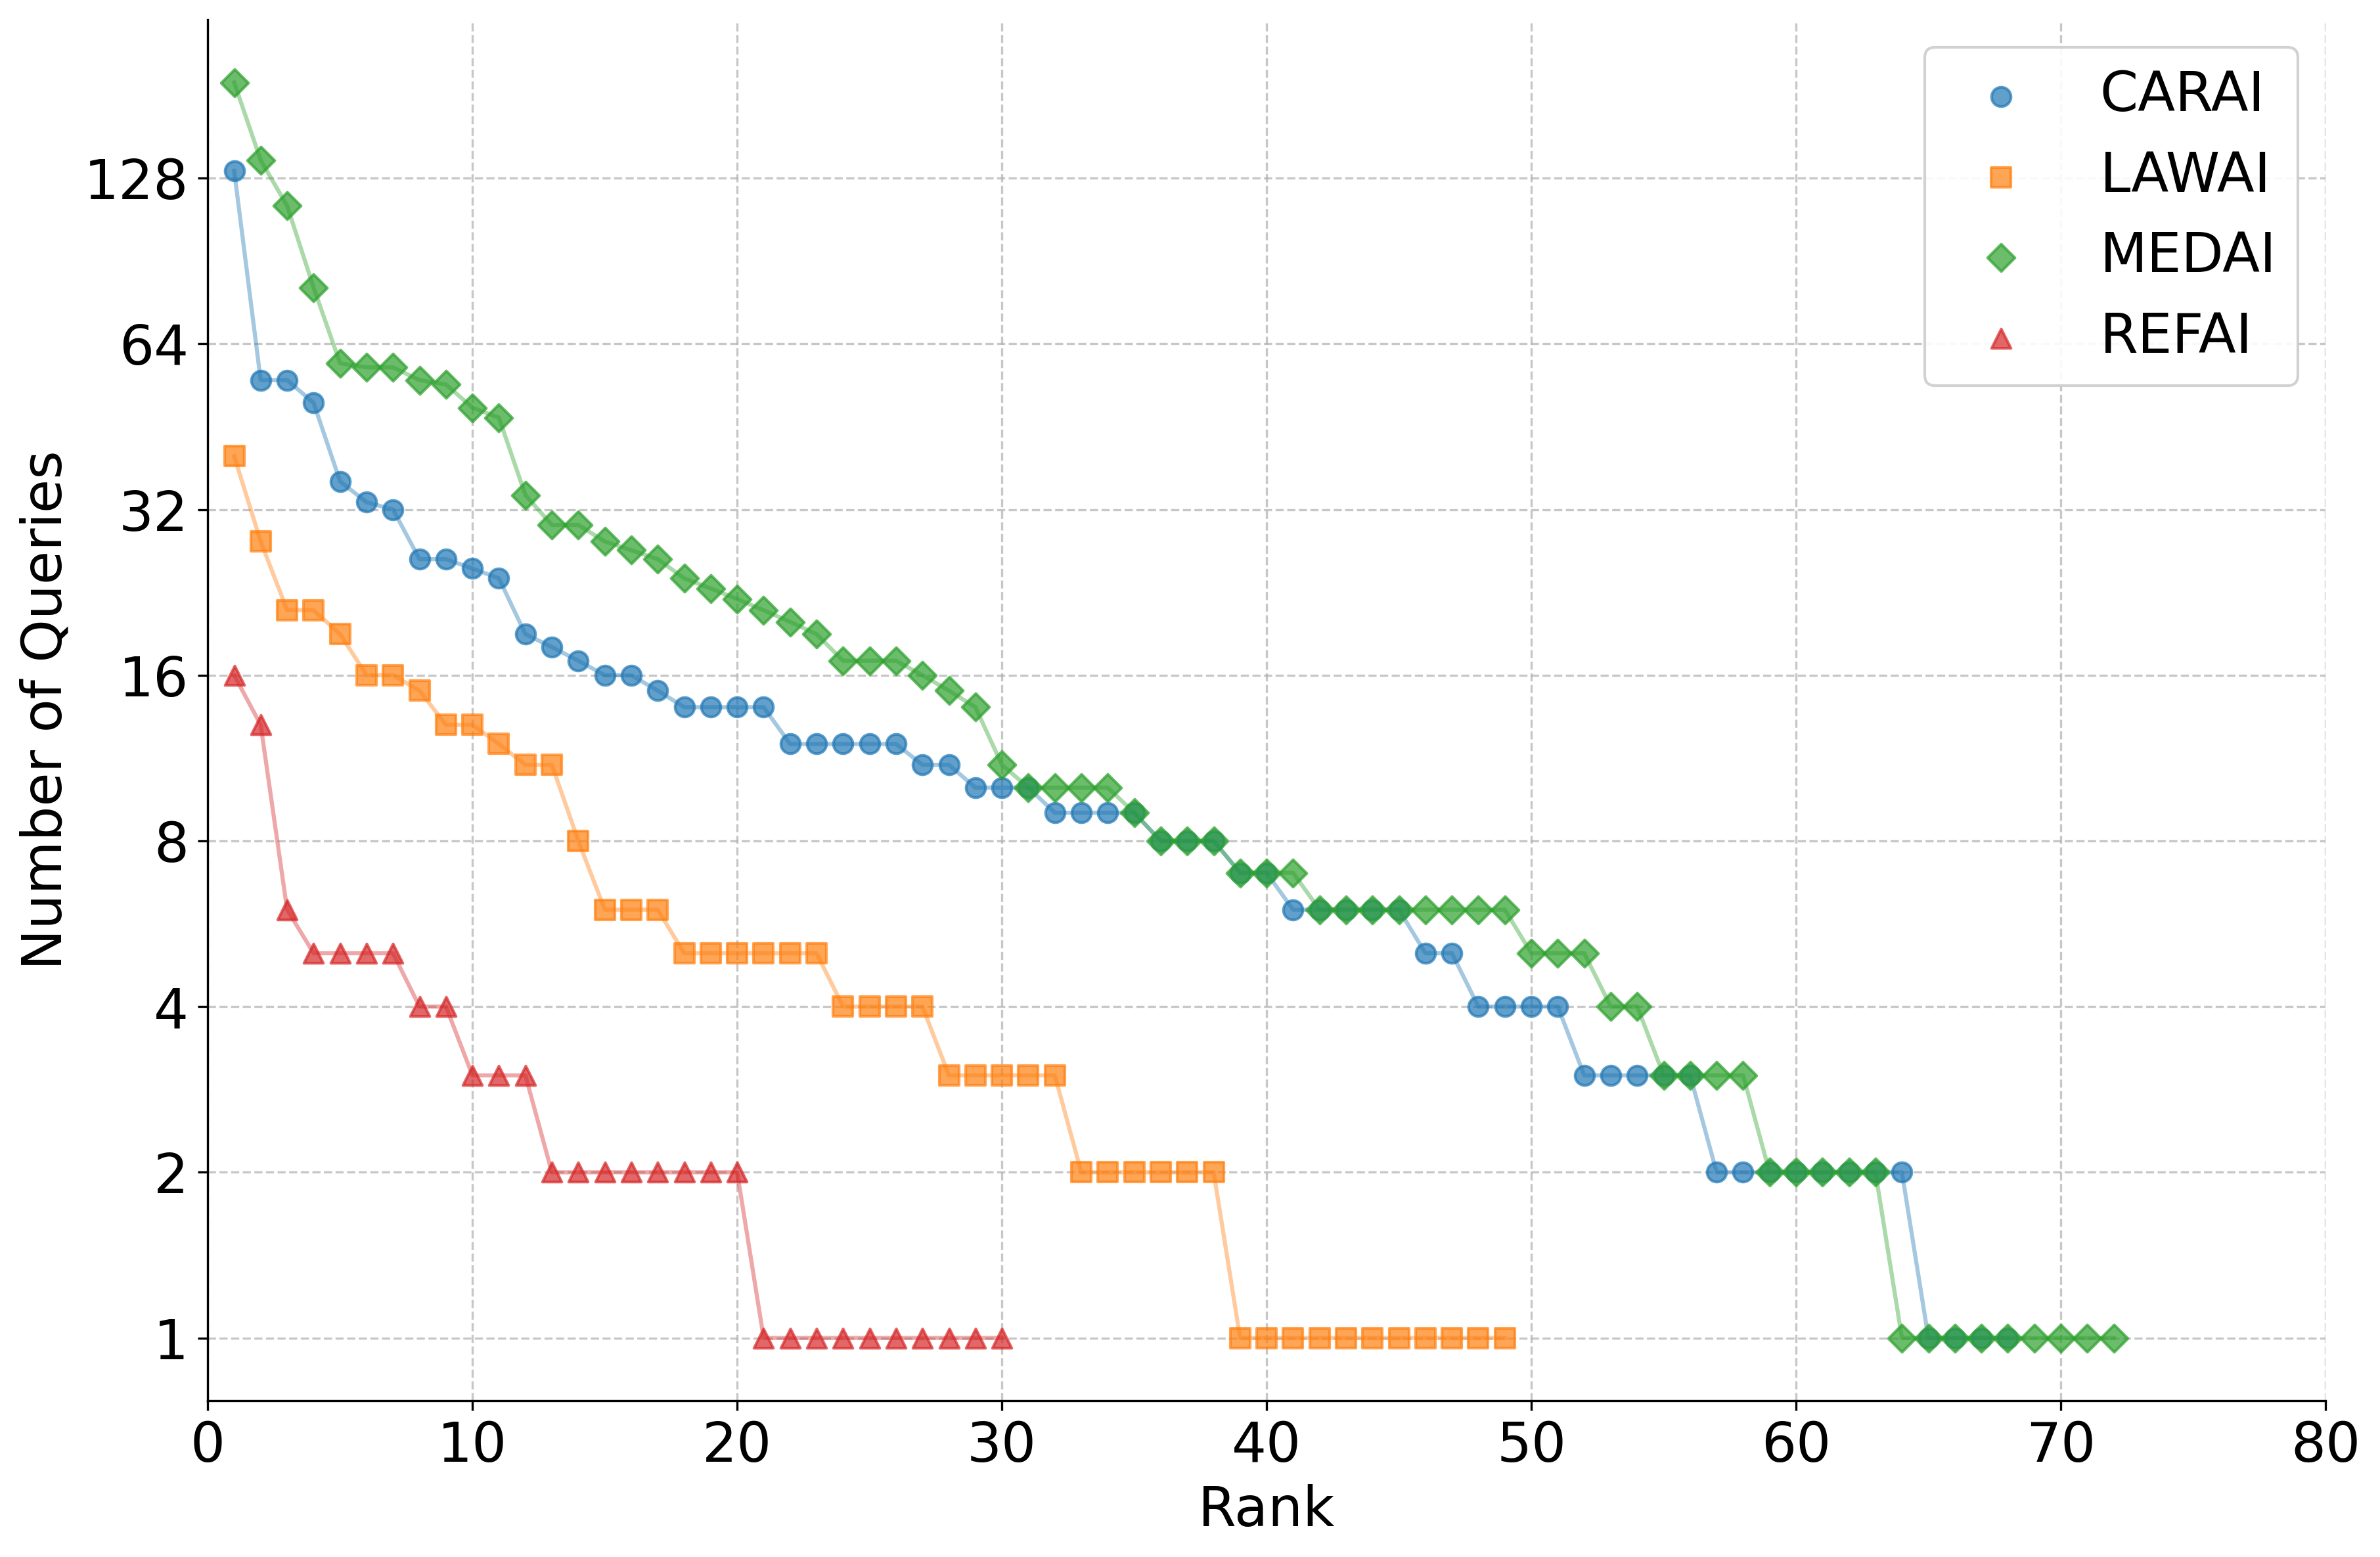

In [10]:
from src.statistics.utils_general import create_combined_rank_frequency_plot
from src.statistics.corpus_dataset.utils import get_split_key_count_per_label_for_corpus_dataset

label_query_counts = get_split_key_count_per_label_for_corpus_dataset(corpus_dataset, "queries", "labels")
print(label_query_counts.pivot_table(index="label", columns="scenario", values="count", fill_value=0))

# # Create a linear scale rank-frequency plot
fig, ax = create_combined_rank_frequency_plot(
    label_query_counts.pivot_table(index="label", columns="scenario", values="count"),
    figsize=(12, 8),
    ylabel='Number of Queries',
    log_y="symlog",
    linthresh=1,
    rename_splits={"MEDAI": "MEDAI", "JURAI": "LAWAI", "AUTOAI": "CARAI", "REFAI": "REFAI"}
)

# For better visualization of the long tail
ax.set_xlim(0, 80)  # Focus on first 50 ranks
plt.savefig(f'{output_directory}/query_label_rank_frequency.eps', format="eps")

In [9]:
from datasets import DatasetDict


# count label types and amount of queries
# z args: main and counter
# nz args: main
# faq questions
# number of noisy queries
def get_label_type_counts_for_scenario(lq_counts, noisy_queries: DatasetDict):
    scenario_type_counts = defaultdict(lambda: defaultdict(int))
    for scenario, label_counts in lq_counts.items():
        ag = argument_graphs[scenario]
        z_main_labels = [template.label for template in ag.first_level_z_templates]
        z_counter_labels = [label for label in ag.z_arguments_labels if label not in z_main_labels]
        nz_labels = [template.label for template in ag.nz_arguments_first_level_templates]
        faq_question_labels = ag.faq_question_labels
        label_to_type = {label: "main" for label in z_main_labels}
        label_to_type.update({label: "counter" for label in z_counter_labels})
        label_to_type.update({label: "unfounded" for label in nz_labels})
        label_to_type.update({label: "faq" for label in faq_question_labels})

        for label, count in label_counts.items():
            scenario_type_counts[scenario][label_to_type[label]] += count

        print(noisy_queries.filter(lambda entry: entry["discussion_scenario"] == scenario))
        nq = noisy_queries.filter(lambda entry: entry["discussion_scenario"] == scenario).num_rows
        scenario_type_counts[scenario]["other"] = nq
    return scenario_type_counts


# get_label_type_counts_for_scenario(label_query_counts, )
df = pd.DataFrame(get_label_type_counts_for_scenario(label_query_counts, loaded_dataset["noisy_queries"]))
df.loc['Total'] = df.sum()
display(df)
df.to_csv("num_label_types_per_scenario.csv")


NameError: name 'loaded_dataset' is not defined

In [ ]:
import matplotlib.pyplot as plt


def get_zero_count_labels(results):
    """
    For each discussion scenario, find all labels that have zero count for any passage source.

    Args:
    results (dict): Dictionary with discussion scenarios as keys and DataFrames as values.

    Returns:
    dict: Dictionary where keys are discussion scenarios and values are lists of tuples,
          each containing a label and the passage source with zero count.
    """
    zero_counts = {}
    excluded_labels = ["NZ.K1-1", "NZ.K2-1", "NZ.K3-1", "NZ.K4-1", "NZ.K5-1", "NZ.K6-1", "NZ.K7-1", "NZ.K8-1",
                       "NZ.K9-1", "NZ.K10-1",
                       "NZ.P1-1", "NZ.P2-1", "NZ.P3-1", "NZ.P4-1", "NZ.P5-1", "NZ.P6-1", "NZ.P7-1", "NZ.P8-1",
                       "NZ.P9-1", "NZ.P10-1",
                       ]
    for scenario, table in results.items():
        zero_labels = []
        for label, row in table.iterrows():
            if label in excluded_labels:
                continue
            for column in table.columns:
                if row[column] == 0:
                    zero_labels.append((label, column))

        zero_counts[scenario] = zero_labels

    return zero_counts


# Create a results dictionary
results = {}

for scenario, labels in labels_per_scenario.items():
    # Filter passages for the current discussion scenario
    scenario_passages = passages_df[passages_df["discussion_scenario"] == scenario]

    # Count passages per label and passage source
    passage_counts = (
        scenario_passages.groupby(["label", "passage_source"]).size().unstack(fill_value=0)
    )

    # Ensure all labels from the graph are present in the table (fill missing labels with 0)
    passage_counts = passage_counts.reindex(labels, fill_value=0).sort_values("user_utterance", ascending=False)

    # Store the table for visualization
    results[scenario] = passage_counts

    # Plot the stacked bar chart
    passage_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
    plt.xlabel("Label")
    plt.ylabel("Number of Passages")
    plt.title(f"Passage Distribution by Label and Source for {scenario}")
    plt.xticks(rotation=90)
    plt.legend(title="Passage Source")
    plt.show()
    display(passage_counts)
    print("\n\n")
    display(get_zero_count_labels(results))



# Display tables for each DiscussionScenario
# for scenario, table in results.items():
#     display(table, scenario)

In [ ]:
results["MEDAI"]